## 다중선형회귀분석 실습
- 보스턴 집값 데이터 로드
- 단순선형회귀 분석
- 다중선형회귀 분석
- 모델의 요약표 해석
    - 회귀계수
    - R-squared
    - p-value
- 다중공선성 해결 방법
    - 상관계수
    - 산점도
    - VIF
- Feature Selection의 방법

#### 보스턴 집값 데이터 로드
- data: 독립변수 ndarray 배열
- target: 종속변수 ndarray 배열
- feature_names: 독립변수 이름 리스트
- target_names: (옵션) 종속변수 이름 리스트
- DESCR: (옵션) 자료에 대한 설명 문자열

In [1]:
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [2]:
boston_datas = load_boston()

In [3]:
boston_datas.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

#### feature 데이터 : 독립변수
- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

#### target 데이터 : 종속변수
- MEDV: 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [6]:
# 독립변수, 종속변수 설정
dfX = pd.DataFrame(boston_datas.data, columns=boston_datas.feature_names)
dfY = pd.DataFrame(boston_datas.target, columns=["MEDV"])

In [7]:
boston = pd.concat([dfX, dfY], axis=1)
boston.tail(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### 1. 단순선형회귀분석
- 범죄율과 집값
- 주택당 방수와 집값
- 인구중 하위계층의 비율과 집값

### 2. 다중선형회귀 분석
- 'CRIM','RM','LSTAT' : 3개의 변수를 독립변수로 설정

In [18]:
target = boston[["MEDV"]]
feature_1 = boston[["CRIM", "RM", "LSTAT"]]

In [19]:
# feature 데이터에 상수항 추가
feature_1 = sm.add_constant(feature_1, has_constant="add")

In [20]:
# 모델 학습
model_1 = sm.OLS(target, feature_1).fit()

In [21]:
# 회귀계수 확인
model_1.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [22]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.644    
Dependent Variable: MEDV             AIC:                3163.2316
Date:               2020-06-12 14:37 BIC:                3180.1378
No. Observations:   506              Log-Likelihood:     -1577.6  
Df Model:           3                F-statistic:        305.2    
Df Residuals:       502              Prob (F-statistic): 1.01e-112
R-squared:          0.646            Scale:              30.135   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     -2.5623     3.1660    -0.8093   0.4187   -8.7825    3.6580
CRIM      -0.1029     0.0320    -3.2147   0.0014   -0.1659   -0.0400
RM         5.2170     0.4420    11.8021   0.0000    4.3485    6.0854
LSTAT     -0.5785     0.0477   -12.1354   0.0000   -0.6721   -0.4848
------------------------------------------------------------------
Omnibus:             171.754       Durbin-Watson:          0.822  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       628.308
Skew:                1.535         Prob(JB):               0.000  
Kurtosis:            7.514         Condition No.:          216    
==================================================================

"""

#### beta 값 구하기
$$\beta = (X'X)^{-1}X'y$$

#### $\hat{y}$ 구하기

#### 잔차(rediual) 확인

#### 추가 변수를 독립변수로 설정
- 'CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS'를 독립변수로 설정

In [29]:
feature_2 = boston[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
feature_2 = sm.add_constant(feature_2, has_constant="add")
model_2 = sm.OLS(target, feature_2).fit()

In [31]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.644    
Dependent Variable: MEDV             AIC:                3163.2316
Date:               2020-06-12 14:42 BIC:                3180.1378
No. Observations:   506              Log-Likelihood:     -1577.6  
Df Model:           3                F-statistic:        305.2    
Df Residuals:       502              Prob (F-statistic): 1.01e-112
R-squared:          0.646            Scale:              30.135   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     -2.5623     3.1660    -0.8093   0.4187   -8.7825    3.6580
CRIM      -0.1029     0.0320    -3.2147   0.0014   -0.1659   -0.0400
RM         5.2170     0.4420    11.8021   0.0000    4.3485    6.0854
LSTAT     -0.5785     0.0477   -12.1354   0.0000   -0.6721   -0.4848
------------------------------------------------------------------
Omnibus:             171.754       Durbin-Watson:          0.822  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       628.308
Skew:                1.535         Prob(JB):               0.000  
Kurtosis:            7.514         Condition No.:          216    
==================================================================

"""

In [30]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.656    
Dependent Variable: MEDV             AIC:                3151.0697
Date:               2020-06-12 14:41 BIC:                3193.3351
No. Observations:   506              Log-Likelihood:     -1565.5  
Df Model:           9                F-statistic:        108.1    
Df Residuals:       496              Prob (F-statistic): 5.76e-111
R-squared:          0.662            Scale:              29.078   
--------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const     -7.1088     3.8285   -1.8568   0.0639   -14.6308    0.4132
CRIM      -0.0453     0.0357   -1.2691   0.2050    -0.1154    0.0248
RM         5.0922     0.4584   11.1094   0.0000     4.1917    5.9928
LSTAT     -0.5651     0.0574   -9.8539   0.0000    -0.6778   -0.4525
B          0.0090     0.0030    2.9518   0.0033     0.0030    0.0149
TAX       -0.0060     0.0024   -2.4803   0.0135    -0.0108   -0.0013
AGE        0.0236     0.0143    1.6526   0.0991    -0.0045    0.0517
ZN         0.0294     0.0134    2.1979   0.0284     0.0031    0.0556
NOX        3.4838     3.8328    0.9090   0.3638    -4.0466   11.0143
INDUS      0.0293     0.0652    0.4488   0.6537    -0.0989    0.1574
------------------------------------------------------------------
Omnibus:             195.490       Durbin-Watson:          0.848  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       872.873
Skew:                1.686         Prob(JB):               0.000  
Kurtosis:            8.479         Condition No.:          10365  
==================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

#### 모델의 요약표 해석
- 회귀계수
    - 변수를 추가하면 회귀계수가 작아짐
    - 추가된 변수가 데이터의 설명하는 수치를 빼앗아감
- R-squared
    - 변수를 6개 추가했지만 R-squared 값이 미미하게 높아짐
- p-value
    - 값이 높으면 feature를 제거
    - NOX, INDUS를 제거 해봄

#### 다중공선성 확인
- 상관계수 확인
- 산점도 확인
- VIF 이용

In [43]:
import seaborn as sns

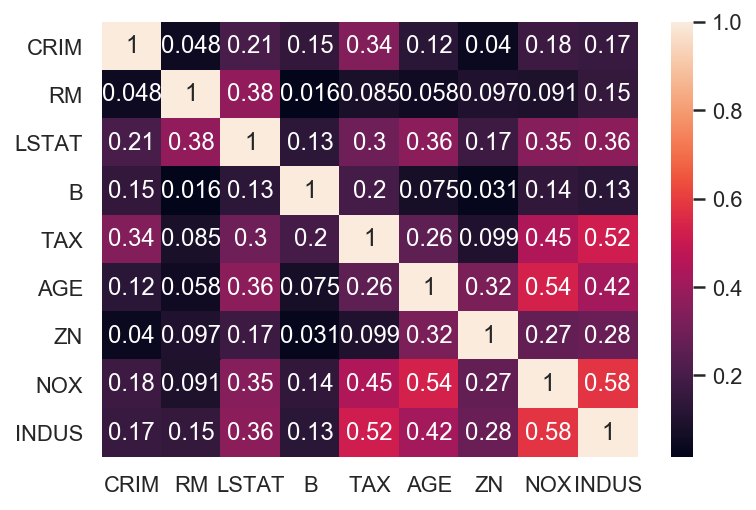

In [36]:
sns.heatmap(feature_2.drop(columns=["const"]).corr()**2, annot=True)

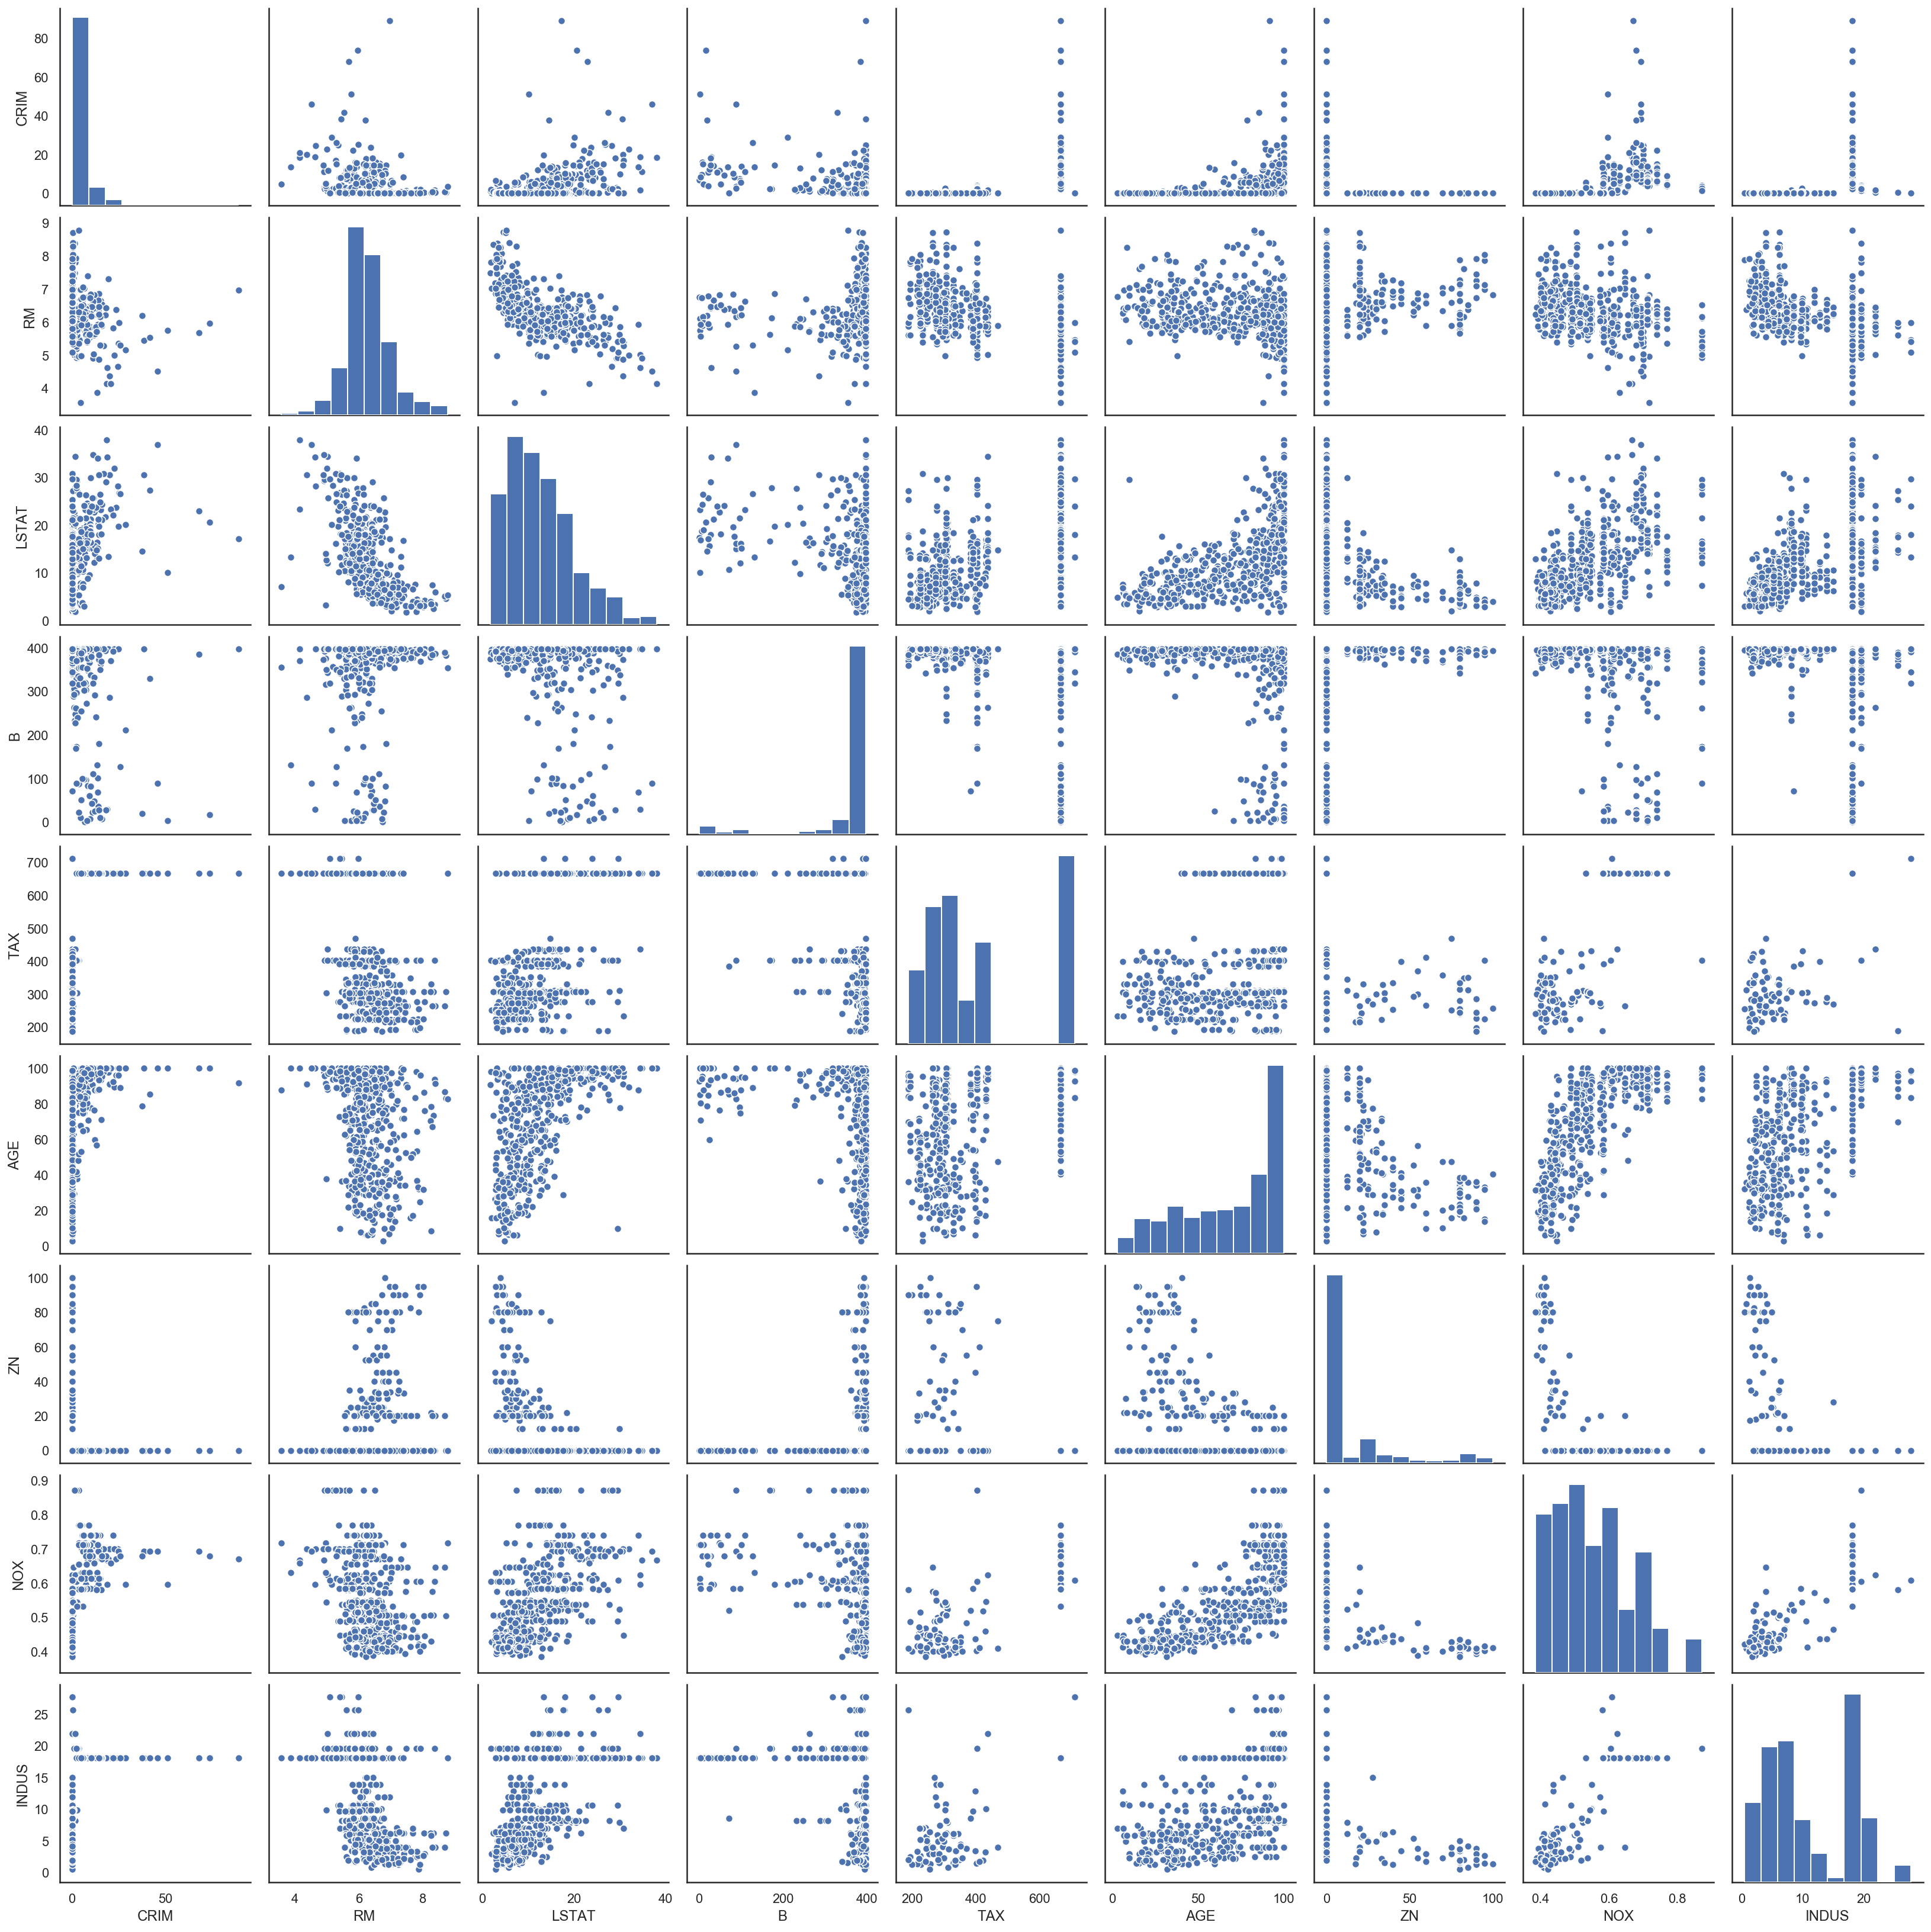

In [37]:
sns.pairplot(feature_2.drop(columns=["const"]))

#### VIF 이용
- RM과 NOX가 값이 높게 나옴

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
feature_2.shape

(506, 10)

In [42]:
feature = feature_2.drop(columns=["const"])
pd.DataFrame({
    "VIF": [variance_inflation_factor(feature.values, idx) 
            for idx in range(feature.shape[1])],
    "features": feature.columns,
})

,VIF,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


#### 모델을 생성하여 검증

#### 학습과 검증 데이터셋의 분할
- feature_5 : 'CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS'
- feature_6 : 'CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'INDUS'
- feature_7 : 'CRIM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'INDUS'

#### feature_5
- 'CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS'

#### feature_6
- 'CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'INDUS'

#### feature_7
- 'CRIM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'INDUS'

#### Feature Selection의 방법
- Feedforward Selection
    - feature를 추가하면서 AIC 확인
    - 최대한 변수를 적게 사용하고 싶을때 사용
- Backward Selection
    - feature를 제거하면서 AIC 확인
    - 변수를 많이 남기고 싶을때 사용
- Stepwise
    - p-value 값으로 변수를 추가하거나 제거해나가는 방법
    - 변수가 추가되거나 제거할 케이스가 없는 경우 종료
    - Forward Selection + Backward Selection
    - 가장 많이 사용